In [1]:
# *********************** *******************************
# Govinda KC                                            #                      
# UTEP, Compuational Science                            #
# Last modified: 1/13/2019                              # 
# *******************************************************

## ******* Violin plot, Box plot and Histogram for Ligandnet2 ********

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [3]:
# Load report file
df = pd.read_csv('Report.csv')
df.head(2)

,Unnamed: 0,xgb_accuracy,xgb_f1_score,xgb_cohen_kappa,xgb_mcc,rf_accuracy,rf_f1_score,rf_cohen_kappa,rf_mcc,svc_accuracy,...,mlp_f1_score,mlp_cohen_kappa,mlp_mcc,train_count,test_count,actives_count,decoys_count,best_model,best_metric,best_score
0,P24530,1.00,1.000,1.0000,1.0000,0.9916,0.9916,0.9811,0.9812,0.9916,...,0.9916,0.9813,0.9815,475,119,198,396,xgb,cohen_kappa,1.0
1,Q9UGN5,0.96,0.957,0.7289,0.7411,0.9733,0.9713,0.8193,0.8330,1.0000,...,0.9713,0.8193,0.8330,598,150,68,680,svc,cohen_kappa,1.0


### ****************Violin plots********************

### ******Violin plots for each evaluated metric******

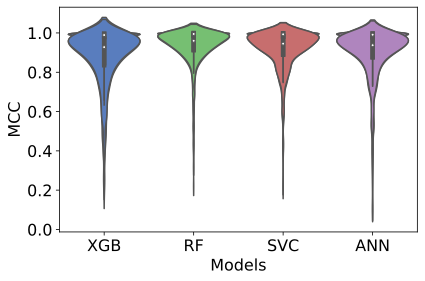

In [13]:
metrics = ['Accuracy', 'F1_Score', 'Cohen_Kappa', 'MCC']
models = ['XGB', 'RF', 'SVC', 'MLP']
for i in metrics:
    data = []
    for j in models:
        data.append(list(df[j.lower()+'_'+i.lower()]))
    ax = sns.violinplot(data= (data), palette="muted",scale='width')
    ax.set_xlabel('Models')
    ax.set_ylabel(' '.join(i.split('_')))
    ax.set_xticklabels(models[:3] + ['ANN'])
    plt.rc('xtick', labelsize = 16 )
    plt.rc('ytick', labelsize = 16)
    plt.rcParams["axes.labelsize"] = 16
    plt.tight_layout()
#     plt.show()
    plt.savefig('plots/'+i,dpi=600)

### ***************Violin plot of Cohen Kappa vs best models********

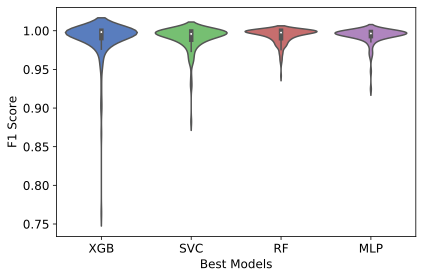

In [18]:
# Apply upper case to best model name
df['best_model'] = df['best_model'].str.upper()
ax = sns.violinplot(x="best_model", y="best_score", data=df, palette="muted",scale='width', font_size=18)
ax.set_xlabel('Best Models')
ax.set_ylabel('F1 Score')
plt.rc('xtick', labelsize = 12 )
plt.rc('ytick', labelsize = 12)
plt.rcParams["axes.labelsize"] = 12
plt.tight_layout()
plt.savefig('plots/'+'f1_score_models',dpi=600)

### ***************Box plot of F1 Score vs best models****************

In [21]:
scores = []
dfn = pd.DataFrame()
for m in metrics:
    metric=[]   
    for n in models:
        metric.extend(list(df[n.lower() +'_'+ m.lower()]))
    dfn[m] = metric
    scores.append(metric)

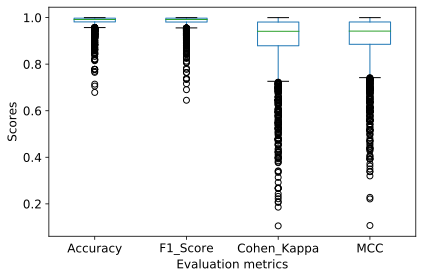

In [22]:
ndf=dfn.boxplot(grid=False)
ndf.set_xlabel('Evaluation metrics')
ndf.set_ylabel('Scores')
plt.rc('xtick', labelsize = 12 )
plt.rc('ytick', labelsize = 12)
plt.rcParams["axes.labelsize"] = 12
plt.tight_layout()
plt.savefig('plots/'+'box_plot.png',dpi=600)

### *************Histogram**************

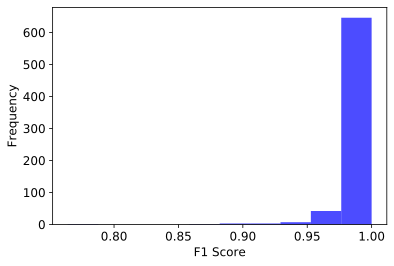

In [27]:
scores = df['best_score'].tolist()
num_bins = 10
n, bins, patches = plt.hist(scores, num_bins, facecolor='blue', alpha=0.7)
plt.xlabel('F1 Score')
plt.ylabel('Frequency')
plt.rc('xtick', labelsize = 12 )
plt.rc('ytick', labelsize = 12)
plt.rcParams["axes.labelsize"] = 12
# plt.show()
plt.savefig('plots/f1_score_freq', dpi = 600)

In [28]:
len(df[df['best_score']>=0.90])

699